In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
tqdm.pandas()

import nltk

In [4]:
DATA_PATH = "/kaggle/input/medquad-medical-question-answer-for-ai-research/medquad.csv"  

df = pd.read_csv(DATA_PATH)

required_cols = {"question","answer","source","focus_area"}
assert required_cols.issubset(df.columns), "❌ CSV must have all 4 required columns."

def clean(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9,.?% -]+"," ",text)
    return re.sub(r"\s+"," ",text).strip()

df["question_clean"] = df["question"].apply(clean)
df["answer_clean"]   = df["answer"].apply(clean)
df["qa_concat"]      = df["question_clean"]+" "+df["answer_clean"]

df.head()


,question,answer,source,focus_area,question_clean,answer_clean,qa_concat
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,what is are glaucoma ?,glaucoma is a group of diseases that can damag...,what is are glaucoma ? glaucoma is a group of ...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,what causes glaucoma ?,"nearly 2.7 million people have glaucoma, a lea...",what causes glaucoma ? nearly 2.7 million peop...
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma,what are the symptoms of glaucoma ?,symptoms of glaucoma glaucoma can develop in o...,what are the symptoms of glaucoma ? symptoms o...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma,what are the treatments for glaucoma ?,"although open-angle glaucoma cannot be cured, ...",what are the treatments for glaucoma ? althoug...
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,what is are glaucoma ?,glaucoma is a group of diseases that can damag...,what is are glaucoma ? glaucoma is a group of ...


In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (16412, 7)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question        16412 non-null  object
 1   answer          16407 non-null  object
 2   source          16412 non-null  object
 3   focus_area      16398 non-null  object
 4   question_clean  16412 non-null  object
 5   answer_clean    16412 non-null  object
 6   qa_concat       16412 non-null  object
dtypes: object(7)
memory usage: 897.7+ KB

Missing Values:
question           0
answer             5
source             0
focus_area        14
question_clean     0
answer_clean       0
qa_concat          0
dtype: int64


/tmp/ipykernel_47/2185935875.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


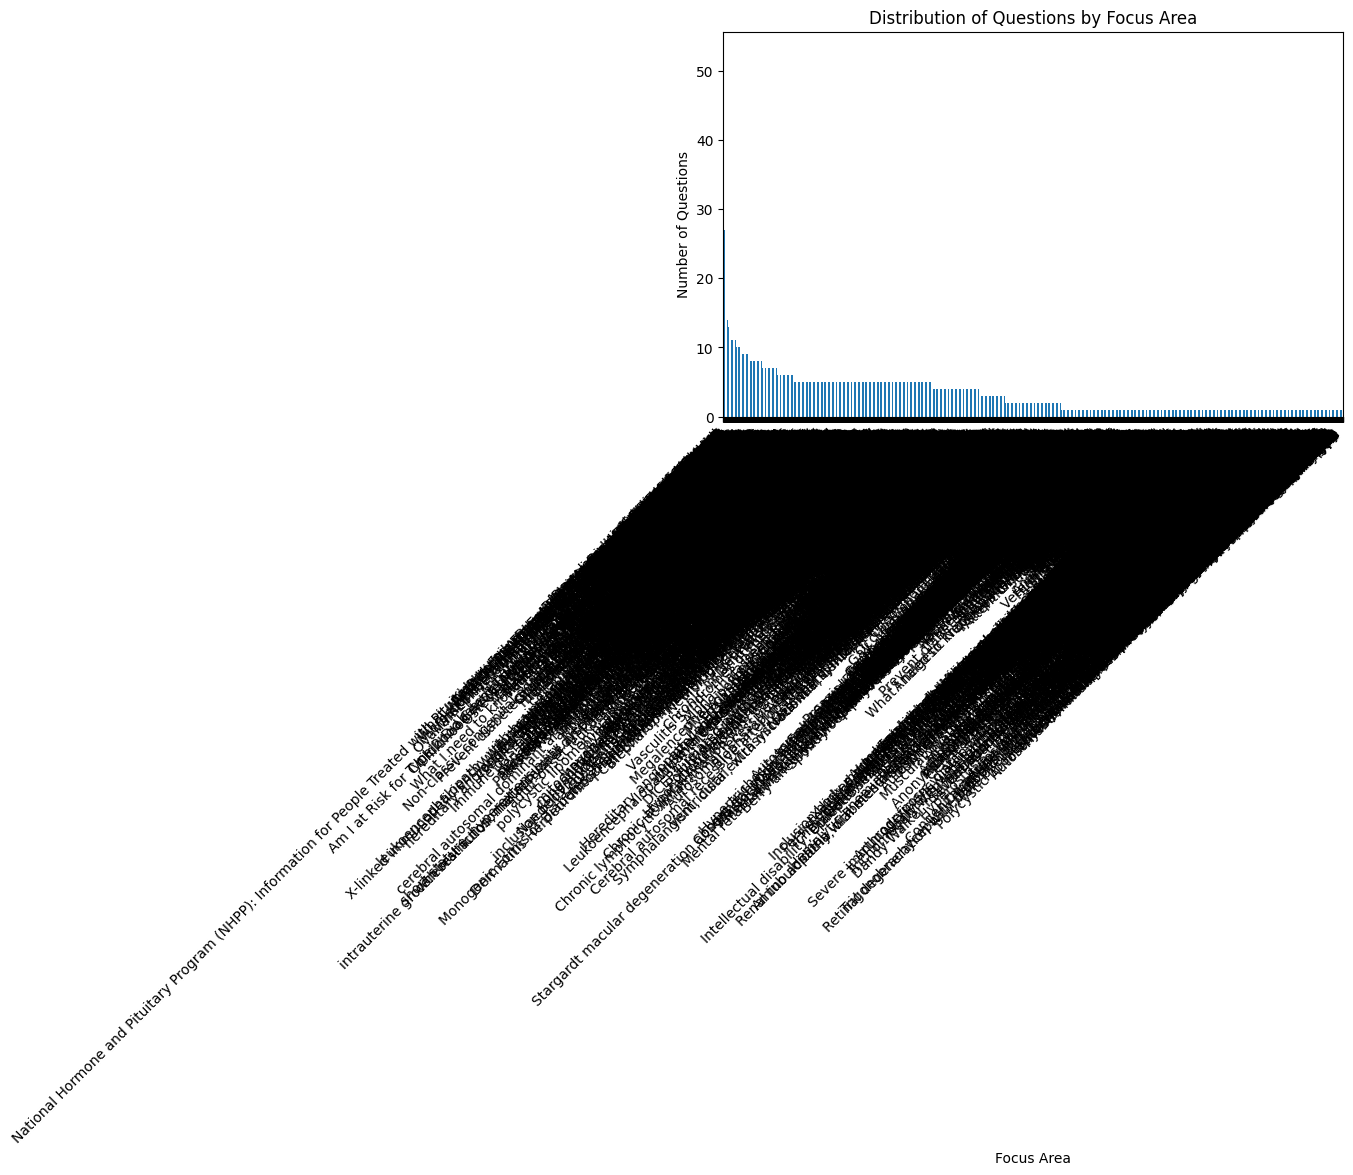

In [9]:
focus_counts = df["focus_area"].value_counts()

plt.figure(figsize=(8,5))
focus_counts.plot(kind="bar")
plt.title("Distribution of Questions by Focus Area")
plt.xlabel("Focus Area")
plt.ylabel("Number of Questions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


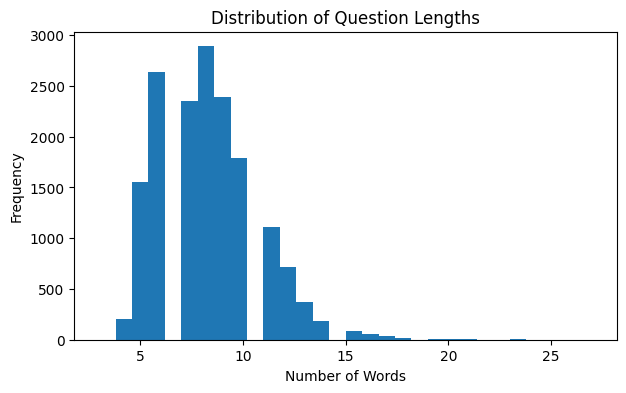

count    16412.000000
mean         8.240921
std          2.392855
min          3.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         27.000000
Name: question_length, dtype: float64


In [10]:
df["question_length"] = df["question_clean"].apply(lambda x: len(x.split()))

plt.figure(figsize=(7,4))
plt.hist(df["question_length"], bins=30)
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print(df["question_length"].describe())


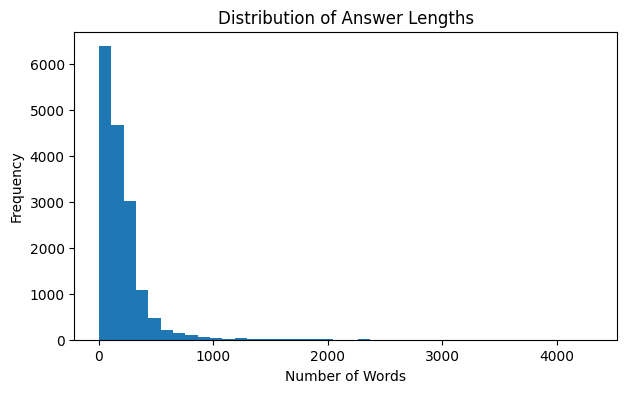

count    16412.000000
mean       202.865647
std        250.230471
min          1.000000
25%         71.000000
50%        140.000000
75%        254.000000
max       4311.000000
Name: answer_length, dtype: float64


In [11]:
df["answer_length"] = df["answer_clean"].apply(lambda x: len(x.split()))

plt.figure(figsize=(7,4))
plt.hist(df["answer_length"], bins=40)
plt.title("Distribution of Answer Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

print(df["answer_length"].describe())


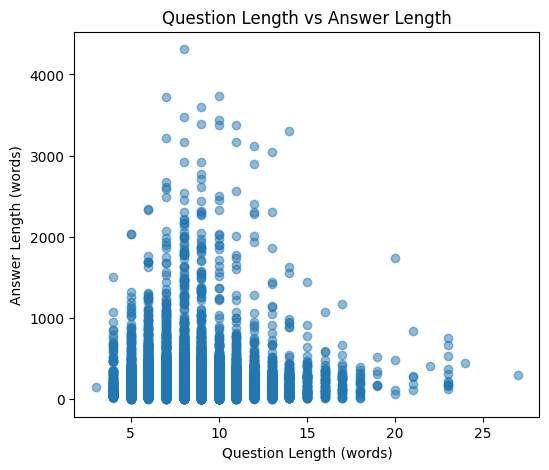

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(df["question_length"], df["answer_length"], alpha=0.5)
plt.xlabel("Question Length (words)")
plt.ylabel("Answer Length (words)")
plt.title("Question Length vs Answer Length")
plt.show()


In [16]:
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words("english"))
def tokenize(text):
    return [t for t in word_tokenize(text) if t not in STOPWORDS]


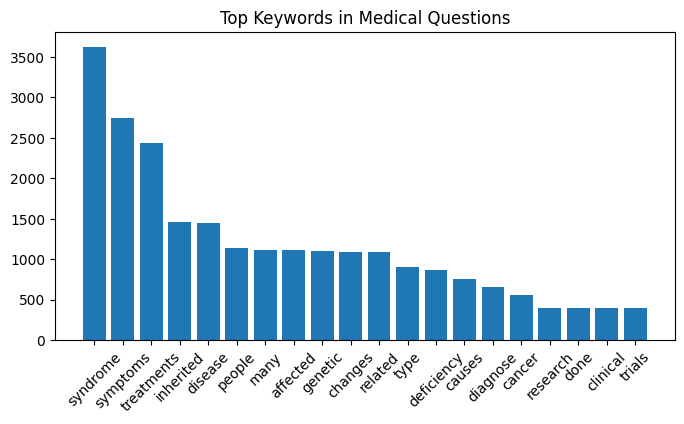

In [17]:
from collections import Counter

all_tokens = []
for text in df["question_clean"]:
    all_tokens.extend([t for t in tokenize(text) if len(t) > 3])

word_freq = Counter(all_tokens).most_common(20)

words, counts = zip(*word_freq)

plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top Keywords in Medical Questions")
plt.show()


In [20]:
df.describe

<bound method NDFrame.describe of                                                 question  \
0                               What is (are) Glaucoma ?   
1                                 What causes Glaucoma ?   
2                    What are the symptoms of Glaucoma ?   
3                 What are the treatments for Glaucoma ?   
4                               What is (are) Glaucoma ?   
...                                                  ...   
16407  What is (are) Diabetic Neuropathies: The Nerve...   
16408  How to prevent Diabetic Neuropathies: The Nerv...   
16409  How to diagnose Diabetic Neuropathies: The Ner...   
16410  What are the treatments for Diabetic Neuropath...   
16411  What to do for Diabetic Neuropathies: The Nerv...   

                                                  answer           source  \
0      Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1      Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2      Symptom

In [21]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique Focus Areas:", df["focus_area"].nunique())
print("Unique Sources:", df["source"].nunique())


Shape: (16412, 9)

Missing values:
 question            0
answer              5
source              0
focus_area         14
question_clean      0
answer_clean        0
qa_concat           0
question_length     0
answer_length       0
dtype: int64

Unique Focus Areas: 5126
Unique Sources: 9


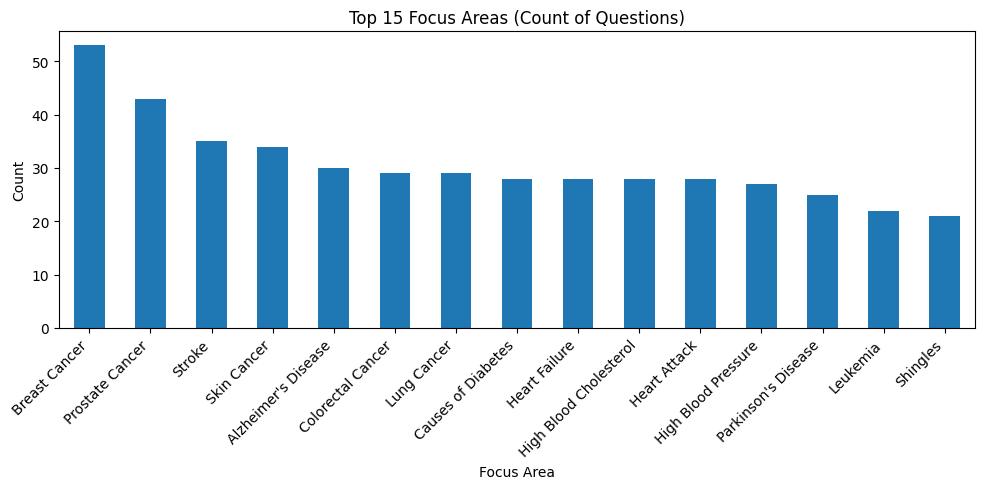

focus_area
Breast Cancer             53
Prostate Cancer           43
Stroke                    35
Skin Cancer               34
Alzheimer's Disease       30
Colorectal Cancer         29
Lung Cancer               29
Causes of Diabetes        28
Heart Failure             28
High Blood Cholesterol    28
Heart Attack              28
High Blood Pressure       27
Parkinson's Disease       25
Leukemia                  22
Shingles                  21
Name: count, dtype: int64

In [22]:
focus_counts = df["focus_area"].value_counts().head(15)

plt.figure(figsize=(10, 5))
focus_counts.plot(kind="bar")
plt.title("Top 15 Focus Areas (Count of Questions)")
plt.xlabel("Focus Area")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

focus_counts


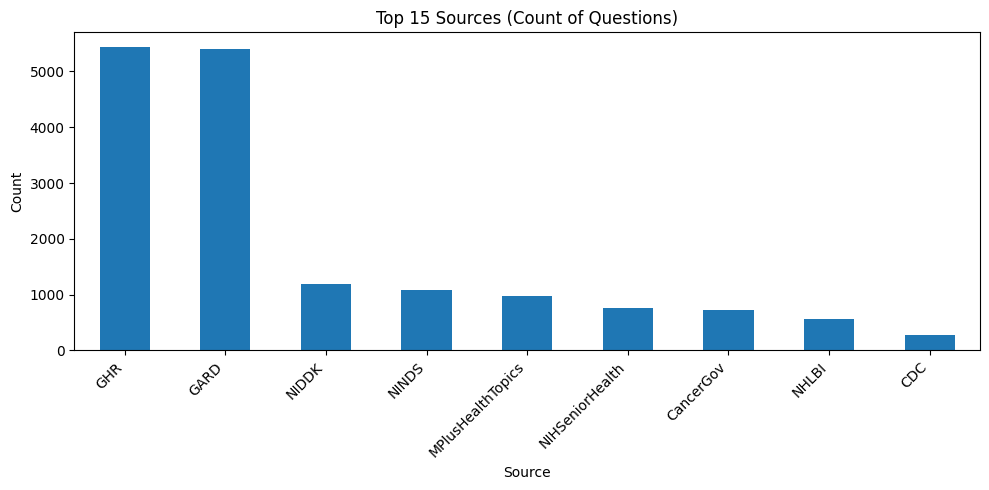

source
GHR                  5430
GARD                 5394
NIDDK                1192
NINDS                1088
MPlusHealthTopics     981
NIHSeniorHealth       769
CancerGov             729
NHLBI                 559
CDC                   270
Name: count, dtype: int64

In [24]:
source_counts = df["source"].value_counts().head(15)

plt.figure(figsize=(10, 5))
source_counts.plot(kind="bar")
plt.title("Top 15 Sources (Count of Questions)")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

source_counts
